In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
tracks_df = pd.read_csv('Datafiles/SpotifyFeatures.csv')

In [3]:
print(tracks_df.head(5))
print(tracks_df.dtypes)
print(tracks_df.describe())

   genre        artist_name                        track_name  \
0  Movie     Henri Salvador       C'est beau de faire un Show   
1  Movie  Martin & les fées  Perdu d'avance (par Gad Elmaleh)   
2  Movie    Joseph Williams    Don't Let Me Be Lonely Tonight   
3  Movie     Henri Salvador    Dis-moi Monsieur Gordon Cooper   
4  Movie       Fabien Nataf                         Ouverture   

                 track_id  popularity  acousticness  danceability  \
0  0BRjO6ga9RKCKjfDqeFgWV           0         0.611         0.389   
1  0BjC1NfoEOOusryehmNudP           1         0.246         0.590   
2  0CoSDzoNIKCRs124s9uTVy           3         0.952         0.663   
3  0Gc6TVm52BwZD07Ki6tIvf           0         0.703         0.240   
4  0IuslXpMROHdEPvSl1fTQK           4         0.950         0.331   

   duration_ms  energy  instrumentalness key  liveness  loudness   mode  \
0        99373   0.910             0.000  C#    0.3460    -1.828  Major   
1       137373   0.737             0.000  F#

In [4]:
targets = ['popularity']
columns = 'acousticness danceability energy instrumentalness liveness loudness speechiness tempo valence'.split()
popular = tracks_df[tracks_df['popularity'] > 75]

#sns.pairplot(popular[columns + targets])

Text(0.5, 1.0, 'Correlation Matrix')

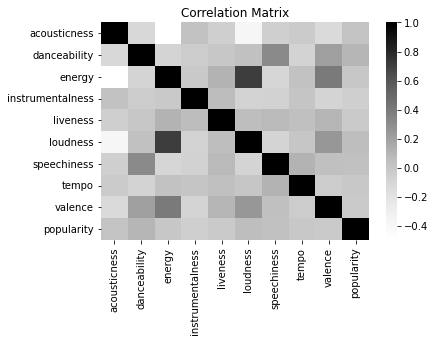

In [5]:
ax = plt.axes()
sns.heatmap(popular[columns + targets].corr(), cmap='Greys')
ax.set_title('Correlation Matrix')

In [6]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

In [7]:
train, test = train_test_split(popular, test_size=0.2)

In [8]:
scaler = StandardScaler(copy=False)
scaler.fit_transform(train[columns])
scaler.transform(test[columns])

array([[ 0.83275351,  0.33087688, -0.16979999, ..., -0.48113486,
        -0.75416178,  0.06747326],
       [ 3.34843956, -0.48707428, -2.69579581, ..., -0.78421235,
        -1.45495656, -0.33989068],
       [ 2.69743023,  0.1137217 , -2.08119829, ..., -0.1492842 ,
        -0.06890315, -1.01730488],
       ...,
       [ 0.45609812,  0.49736252, -0.95033884, ..., -0.42550672,
         0.4988786 ,  0.18190133],
       [ 1.87436844,  0.89548034,  0.98564336, ...,  0.1067971 ,
        -1.03228308,  0.9737436 ],
       [-0.89102618,  0.33811539,  1.18846054, ..., -0.70940209,
        -1.03033672,  1.76558587]])

In [9]:
pca_components = 3
pca = PCA(n_components=pca_components)
new_train_values = pca.fit_transform(train[columns])
new_test_values = pca.transform(test[columns])

new_columns = []
for index in range(pca_components):
    name = 'pca' + str(index)
    train.loc[:, name] = new_train_values[:, index]
    test.loc[:, name] = new_test_values[:, index]
    new_columns.append(name)

Text(0.5, 1.0, 'Correlation Matrix')

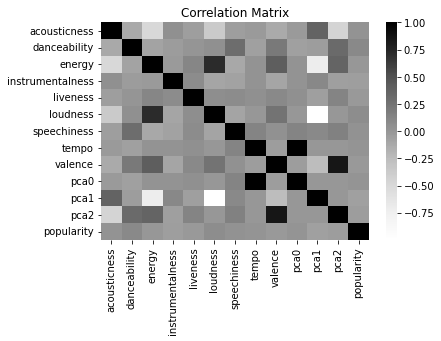

In [10]:
ax = plt.axes()
sns.heatmap(train[columns + new_columns + targets].corr(), cmap='Greys')
ax.set_title('Correlation Matrix')

In [16]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, Activation, Dropout

model = Sequential()

# Input layer
model.add(Dense(len(new_columns), activation='relu'))
#model.add(Dropout(0.25))

# Hidden layer
model.add(Dense(5, activation='relu'))
#model.add(Dropout(0.25))

# Hidden layer
model.add(Dense(3, activation='relu'))
#model.add(Dropout(0.25))

# Output layer
model.add(Dense(1, activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam')
early_stop = EarlyStopping(monitor='loss', mode='min', verbose=0, patience=20)
model.fit(x=train[new_columns].values,
          y=train[targets].values.ravel(),
          epochs=200,
          callbacks=[early_stop]
         )

Epoch 1/200
74/74 [==============================] - 0s 730us/step - loss: -632.9293
Epoch 2/200
74/74 [==============================] - 0s 660us/step - loss: -1134.2388
Epoch 3/200
74/74 [==============================] - 0s 637us/step - loss: -2010.6342
Epoch 4/200
74/74 [==============================] - 0s 666us/step - loss: -3497.3059
Epoch 5/200
74/74 [==============================] - 0s 658us/step - loss: -5900.2437
Epoch 6/200
74/74 [==============================] - 0s 661us/step - loss: -9601.5176
Epoch 7/200
74/74 [==============================] - 0s 648us/step - loss: -15099.3418
Epoch 8/200
74/74 [==============================] - 0s 656us/step - loss: -23161.5391
Epoch 9/200
74/74 [==============================] - 0s 635us/step - loss: -34644.9844
Epoch 10/200
74/74 [==============================] - 0s 646us/step - loss: -50124.4844
Epoch 11/200
74/74 [==============================] - 0s 659us/step - loss: -70453.3438
Epoch 12/200
74/74 [============================

74/74 [==============================] - 0s 654us/step - loss: -95056464.0000
Epoch 93/200
74/74 [==============================] - 0s 634us/step - loss: -98324496.0000
Epoch 94/200
74/74 [==============================] - 0s 648us/step - loss: -101665784.0000
Epoch 95/200
74/74 [==============================] - 0s 642us/step - loss: -105081160.0000
Epoch 96/200
74/74 [==============================] - 0s 639us/step - loss: -108572944.0000
Epoch 97/200
74/74 [==============================] - 0s 663us/step - loss: -112145328.0000
Epoch 98/200
74/74 [==============================] - 0s 671us/step - loss: -115803352.0000
Epoch 99/200
74/74 [==============================] - 0s 675us/step - loss: -119528088.0000
Epoch 100/200
74/74 [==============================] - 0s 643us/step - loss: -123347584.0000
Epoch 101/200
74/74 [==============================] - 0s 645us/step - loss: -127237656.0000
Epoch 102/200
74/74 [==============================] - 0s 648us/step - loss: -131213208.0000


74/74 [==============================] - 0s 728us/step - loss: -788279168.0000
Epoch 181/200
74/74 [==============================] - 0s 669us/step - loss: -802374208.0000
Epoch 182/200
74/74 [==============================] - 0s 648us/step - loss: -816683776.0000
Epoch 183/200
74/74 [==============================] - 0s 754us/step - loss: -831158592.0000
Epoch 184/200
74/74 [==============================] - 0s 668us/step - loss: -845791552.0000
Epoch 185/200
74/74 [==============================] - 0s 630us/step - loss: -860636864.0000
Epoch 186/200
74/74 [==============================] - 0s 623us/step - loss: -875672576.0000
Epoch 187/200
74/74 [==============================] - 0s 631us/step - loss: -890871424.0000
Epoch 188/200
74/74 [==============================] - 0s 664us/step - loss: -906263680.0000
Epoch 189/200
74/74 [==============================] - 0s 725us/step - loss: -921846144.0000
Epoch 190/200
74/74 [==============================] - 0s 641us/step - loss: -937616

In [18]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

TypeError: no numeric data to plot

In [13]:
from sklearn.metrics import classification_report, confusion_matrix

In [17]:
predictions = model.predict(test[new_columns])
predictions
#print(classification_report(test[targets],predictions))

19/19 [==============================] - 0s 594us/step


array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],